# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# was not included in starter code so had to add json
import json

# Import API key
from api_keys2 import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Get Weather Data
#test load of the data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(weather_url + city)
city_weather_json = response.json()
print(json.dumps(city_weather_json))

{"coord": {"lon": 61.4036, "lat": 41.1875}, "weather": [{"id": 800, "main": "Clear", "description": "clear sky", "icon": "01n"}], "base": "stations", "main": {"temp": 50.14, "feels_like": 47.35, "temp_min": 50.14, "temp_max": 50.14, "pressure": 1026, "humidity": 53, "sea_level": 1026, "grnd_level": 1011}, "visibility": 10000, "wind": {"speed": 7.43, "deg": 151, "gust": 7.36}, "clouds": {"all": 3}, "dt": 1668967862, "sys": {"country": "TM", "sunrise": 1668912477, "sunset": 1668947534}, "timezone": 18000, "id": 1514792, "name": "Gazojak", "cod": 200}


In [5]:
#load good layout of json file
city_weather_json

{'coord': {'lon': 61.4036, 'lat': 41.1875},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 50.14,
  'feels_like': 47.35,
  'temp_min': 50.14,
  'temp_max': 50.14,
  'pressure': 1026,
  'humidity': 53,
  'sea_level': 1026,
  'grnd_level': 1011},
 'visibility': 10000,
 'wind': {'speed': 7.43, 'deg': 151, 'gust': 7.36},
 'clouds': {'all': 3},
 'dt': 1668967862,
 'sys': {'country': 'TM', 'sunrise': 1668912477, 'sunset': 1668947534},
 'timezone': 18000,
 'id': 1514792,
 'name': 'Gazojak',
 'cod': 200}

In [6]:
latitude = city_weather_json["coord"]["lat"]
latitude

41.1875

In [7]:
Max_Temp = city_weather_json["main"]["temp_max"]
Max_Temp

50.14

In [8]:
latitude = city_weather_json["coord"]["lon"]
latitude

61.4036

In [9]:
Humidity = city_weather_json["main"]["humidity"]
Humidity

53

In [10]:
Cloudiness = city_weather_json["clouds"]["all"]
Cloudiness

3

In [11]:
Wind_Speed = city_weather_json["wind"]["speed"]
Wind_Speed

7.43

In [12]:
Country = city_weather_json["sys"]["country"]
Country

'TM'

In [13]:
Date = city_weather_json["dt"]
Date

1668967862

In [22]:
records = []
for city in cities:
    
    weather_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    city_weather_json = requests.get(weather_url).json()
    #response = requests.get(weather_url + city)
    #city_weather_json = response.json()
    #print(city_weather_json["coord"])

    try:
        #city_weather_json = requests.get(weather_url).json()
        latitude = city_weather_json["coord"]["lat"]
        longitude = city_weather_json["coord"]["lon"]
        Max_Temp = city_weather_json["main"]["temp_max"]
        Humidity = city_weather_json["main"]["humidity"]
        Cloudiness = city_weather_json["clouds"]["all"]
        Wind_Speed = city_weather_json["wind"]["speed"]
        Country = city_weather_json["sys"]["country"]
        Date = city_weather_json["dt"]

        records.append({

            "City" : city,
            "Lat" : latitude,
            "Lng" : longitude,
            "Max Temp" : Max_Temp,
            "Humidity" : Humidity,
            "Cloudiness" :Cloudiness,
            "Wind speed" :Wind_Speed,
            "Country" :Country,
            "Date" :Date
        })
            #print("city")

    except:
        print("city not found")
        pass
   

city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found


In [24]:
cities

['yumen',
 'khatanga',
 'aksarka',
 'saint-philippe',
 'albany',
 'cidreira',
 'menongue',
 'hithadhoo',
 'georgetown',
 'lebu',
 'tuktoyaktuk',
 'abay',
 'taolanaro',
 'la ronge',
 'ushuaia',
 'ribeira grande',
 'bay roberts',
 'barrow',
 'yellowknife',
 'saskylakh',
 'constitucion',
 'hamilton',
 'san blas',
 'carnarvon',
 'tasiilaq',
 'puerto ayora',
 'burica',
 'qaanaaq',
 'axim',
 'canavieiras',
 'aswan',
 'sobolevo',
 'portland',
 'umtata',
 'punta arenas',
 'west wendover',
 'cape town',
 'srednekolymsk',
 'cherskiy',
 'bethel',
 'raga',
 'busselton',
 'nikolskoye',
 'hobart',
 'inirida',
 'attawapiskat',
 'sistranda',
 'miura',
 'rikitea',
 'utica',
 'kruisfontein',
 'vaini',
 'kodiak',
 'bilma',
 'bredasdorp',
 'flin flon',
 'butaritari',
 'upington',
 'krasnyy oktyabr',
 'port lincoln',
 'jamestown',
 'barentsburg',
 'fereydun kenar',
 'gillette',
 'kaitangata',
 'tiruvottiyur',
 'teknaf',
 'ryotsu',
 'thompson',
 'deputatskiy',
 'kapaa',
 'altay',
 'rio grande',
 'new norfol

In [23]:
print(records)

[{'City': 'yumen', 'Lat': 40.2833, 'Lng': 97.2, 'Max Temp': 33.06, 'Humidity': 31, 'Cloudiness': 100, 'Wind speed': 2.39, 'Country': 'CN', 'Date': 1668968578}, {'City': 'khatanga', 'Lat': 71.9667, 'Lng': 102.5, 'Max Temp': -32.03, 'Humidity': 100, 'Cloudiness': 91, 'Wind speed': 4.05, 'Country': 'RU', 'Date': 1668968578}, {'City': 'aksarka', 'Lat': 66.5606, 'Lng': 67.7975, 'Max Temp': 5.85, 'Humidity': 96, 'Cloudiness': 100, 'Wind speed': 10.22, 'Country': 'RU', 'Date': 1668968578}, {'City': 'saint-philippe', 'Lat': -21.3585, 'Lng': 55.7679, 'Max Temp': 76.59, 'Humidity': 79, 'Cloudiness': 60, 'Wind speed': 11.77, 'Country': 'RE', 'Date': 1668968579}, {'City': 'albany', 'Lat': 42.6001, 'Lng': -73.9662, 'Max Temp': 33.39, 'Humidity': 43, 'Cloudiness': 3, 'Wind speed': 5.01, 'Country': 'US', 'Date': 1668968579}, {'City': 'cidreira', 'Lat': -30.1811, 'Lng': -50.2056, 'Max Temp': 74.44, 'Humidity': 70, 'Cloudiness': 48, 'Wind speed': 20.76, 'Country': 'BR', 'Date': 1668968579}, {'City': 'm

[]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
City_Data_df = pd.DataFrame(records)
City_Data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,yumen,40.2833,97.2000,33.06,31,100,2.39,CN,1668968578
1,khatanga,71.9667,102.5000,-32.03,100,91,4.05,RU,1668968578
2,aksarka,66.5606,67.7975,5.85,96,100,10.22,RU,1668968578
3,saint-philippe,-21.3585,55.7679,76.59,79,60,11.77,RE,1668968579
4,albany,42.6001,-73.9662,33.39,43,3,5.01,US,1668968579


In [28]:
City_Data_df.to_csv("../output_data/My_Cities_Data.csv")

In [31]:
# has over 500 rows so data is good to use
City_Data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,yumen,40.2833,97.2000,33.06,31,100,2.39,CN,1668968578
1,khatanga,71.9667,102.5000,-32.03,100,91,4.05,RU,1668968578
2,aksarka,66.5606,67.7975,5.85,96,100,10.22,RU,1668968578
3,saint-philippe,-21.3585,55.7679,76.59,79,60,11.77,RE,1668968579
4,albany,42.6001,-73.9662,33.39,43,3,5.01,US,1668968579
...,...,...,...,...,...,...,...,...,...
530,krasnoselkup,65.7000,82.4667,-25.96,100,99,3.78,RU,1668969172
531,termiz,37.2242,67.2783,50.09,81,10,2.30,UZ,1668969042
532,pimentel,-6.8367,-79.9342,73.69,60,0,14.97,PE,1668969172
533,san cristobal,7.7669,-72.2250,78.98,55,89,3.27,VE,1668969172


In [30]:
City_Data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Date
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,5.350000e+02
mean,22.672444,17.097064,52.187402,71.201869,58.422430,8.071907,1.668969e+09
std,32.794940,90.367536,29.243682,22.088950,40.270958,5.685120,2.650847e+02
min,-54.800000,-179.166700,-32.030000,4.000000,0.000000,0.000000,1.668968e+09
25%,-3.252050,-63.549300,33.025000,58.000000,15.000000,3.620000,1.668969e+09
50%,28.017000,22.957300,60.190000,77.000000,74.000000,6.910000,1.668969e+09
75%,50.298850,95.252350,76.075000,88.000000,100.000000,11.500000,1.668969e+09
max,78.218600,179.316700,103.320000,100.000000,100.000000,32.210000,1.668969e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
#  Get the indices of cities that have humidity over 100%.
# No city in my data has over %100 humidity
City_Data_df.loc[City_Data_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date


In [3]:
# had to reload as computer shutdown and with limited api calls I don't want to use more
My_Cities_Data = pd.read_csv("../output_data/My_Cities_Data.csv")
My_Cities_Data.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,0,yumen,40.2833,97.2000,33.06,31,100,2.39,CN,1668968578
1,1,khatanga,71.9667,102.5000,-32.03,100,91,4.05,RU,1668968578
2,2,aksarka,66.5606,67.7975,5.85,96,100,10.22,RU,1668968578
3,3,saint-philippe,-21.3585,55.7679,76.59,79,60,11.77,RE,1668968579
4,4,albany,42.6001,-73.9662,33.39,43,3,5.01,US,1668968579


In [4]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# not needed so skipped

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature')

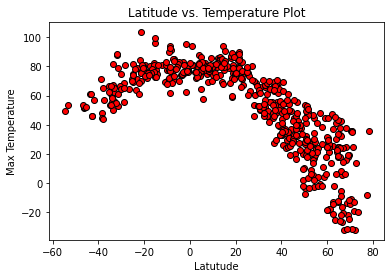

In [8]:
#my plot
plt.scatter(My_Cities_Data['Lat'], My_Cities_Data['Max Temp'], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latutude")
plt.ylabel("Max Temperature")

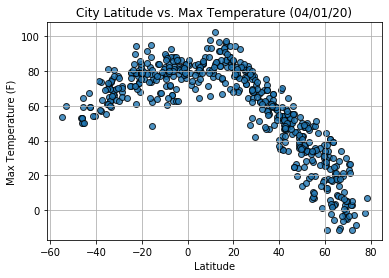

In [10]:
#example given by course

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity %')

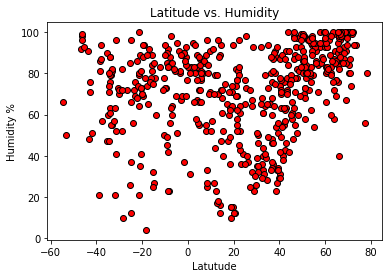

In [12]:
#my plot
plt.scatter(My_Cities_Data['Lat'], My_Cities_Data['Humidity'], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latutude")
plt.ylabel("Humidity %")

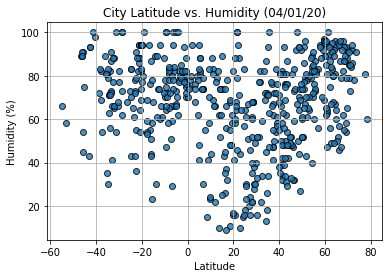

In [11]:
#example given by course

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness %')

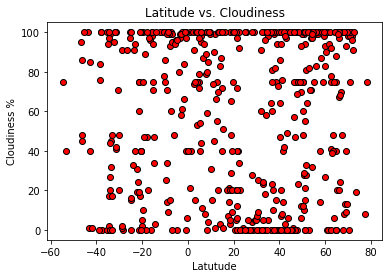

In [13]:
#my plot
plt.scatter(My_Cities_Data['Lat'], My_Cities_Data['Cloudiness'], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latutude")
plt.ylabel("Cloudiness %")

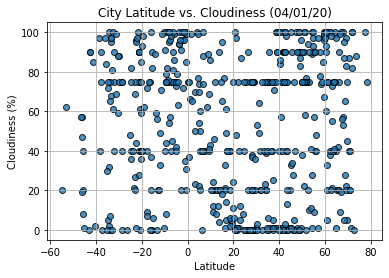

In [12]:
#example given by course

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind speed')

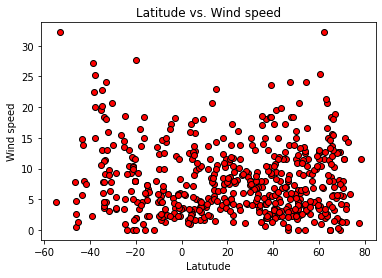

In [15]:
#my plot
plt.scatter(My_Cities_Data['Lat'], My_Cities_Data['Wind speed'], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Wind speed")
plt.xlabel("Latutude")
plt.ylabel("Wind speed")

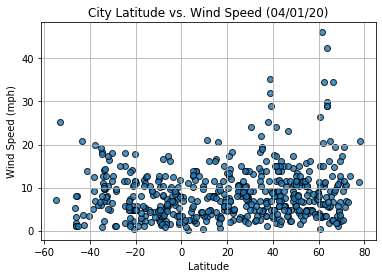

In [13]:
#example given by course

## Linear Regression

In [19]:
# 0 is equator and since it's in the middle it will be in both graphs.
# also makes sense since earth is tilted so sometimes equator more south sun and others north sun
# summer in south oposite north and vise versa
northern_hemisphere = My_Cities_Data.loc[My_Cities_Data["Lat"] >= 0]

southern_hemisphere = My_Cities_Data.loc[My_Cities_Data["Lat"] <= 0]

In [20]:
northern_hemisphere

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,0,yumen,40.2833,97.2000,33.06,31,100,2.39,CN,1668968578
1,1,khatanga,71.9667,102.5000,-32.03,100,91,4.05,RU,1668968578
2,2,aksarka,66.5606,67.7975,5.85,96,100,10.22,RU,1668968578
4,4,albany,42.6001,-73.9662,33.39,43,3,5.01,US,1668968579
8,8,georgetown,5.4112,100.3354,81.23,87,40,3.44,MY,1668968501
...,...,...,...,...,...,...,...,...,...,...
527,527,golfito,8.6390,-83.1660,80.82,84,85,4.63,CR,1668969171
530,530,krasnoselkup,65.7000,82.4667,-25.96,100,99,3.78,RU,1668969172
531,531,termiz,37.2242,67.2783,50.09,81,10,2.30,UZ,1668969042
533,533,san cristobal,7.7669,-72.2250,78.98,55,89,3.27,VE,1668969172


In [21]:
southern_hemisphere

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
3,3,saint-philippe,-21.3585,55.7679,76.59,79,60,11.77,RE,1668968579
5,5,cidreira,-30.1811,-50.2056,74.44,70,48,20.76,BR,1668968579
6,6,menongue,-14.6585,17.6910,77.41,27,47,6.64,AO,1668968579
7,7,hithadhoo,-0.6000,73.0833,80.98,77,6,8.28,MV,1668968579
9,9,lebu,-37.6167,-73.6500,57.11,57,0,25.32,CL,1668968579
...,...,...,...,...,...,...,...,...,...,...
513,513,ibimirim,-8.5406,-37.6903,92.28,23,100,14.65,BR,1668969169
521,521,aitape,-3.1374,142.3475,76.28,89,99,4.36,PG,1668969170
528,528,poso,-1.3959,120.7524,77.11,86,100,4.00,ID,1668969171
529,529,lusambo,-4.9667,23.4500,69.93,95,96,2.33,CD,1668969171


In [ ]:
# was expected that there would me more cities north as it's more populated
# also I think there is less land for cities as south is mostly ocean looking on map.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.8595691942763892


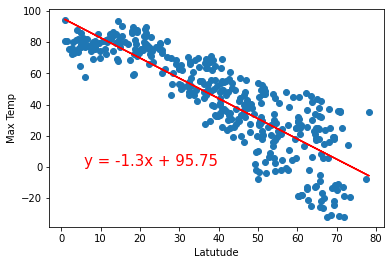

In [23]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Max Temp')
print(f"The r value is: {rvalue}")
plt.show()

The r-value is: 0.46937863826630627


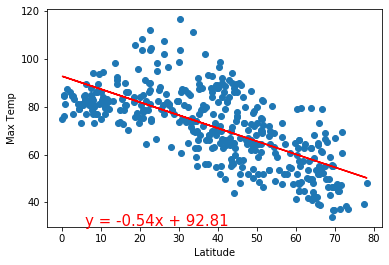

In [25]:
#example given by course

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.6834542622755324
{'y = 0.6x + 84.34'}


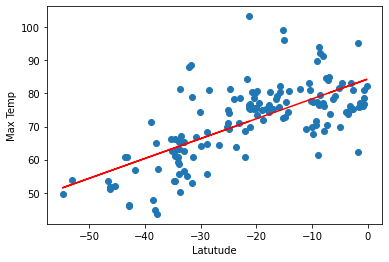

In [46]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=1,color="red")
plt.xlabel('Latutude')
plt.ylabel('Max Temp')
print(f"The r value is: {rvalue}")
print({line_eq})
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.42311116819336936
{'y = 0.47x + 52.97'}


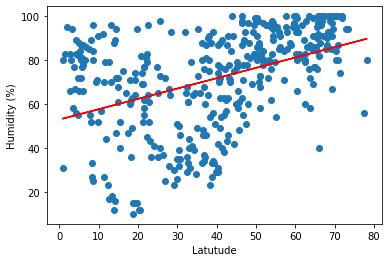

In [57]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Humidity (%)')
print(f"The r value is: {rvalue}")
print({line_eq})
plt.show()

The r-value is: 0.000543987878808455


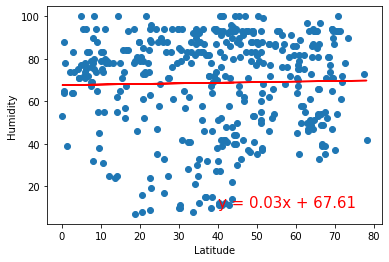

In [27]:
#example given by course

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.06400010027957936
{'y = 0.1x + 72.56'}


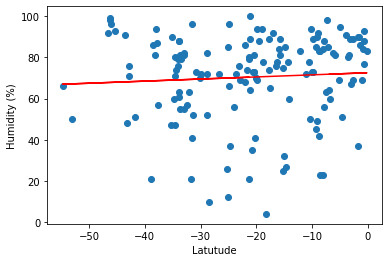

In [54]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Humidity (%)')
print(f"The r value is: {rvalue}")
print({line_eq})
plt.show()

The r-value is: 0.014985174297345524


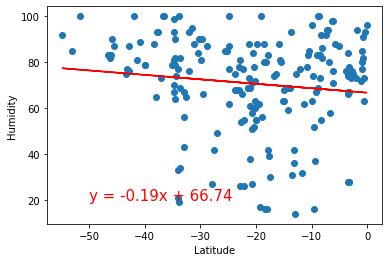

In [28]:
#example given by course

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.11674237918850432
{'y = 0.24x + 48.79'}


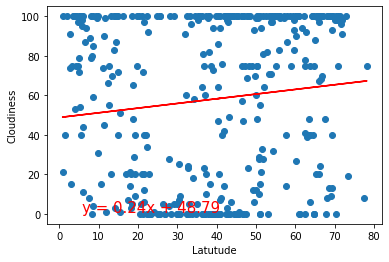

In [53]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Cloudiness')
print(f"The r value is: {rvalue}")
print({line_eq})
plt.show()

The r-value is: 0.0020898727664228514


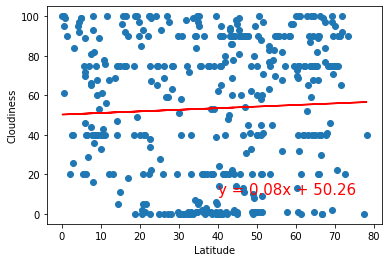

In [29]:
#example given by course

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.18683338978227773
{'y = 0.54x + 70.66'}


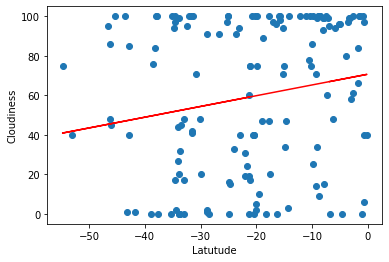

In [58]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Cloudiness')
print(f"The r value is: {rvalue}")
print({line_eq})
plt.show()

The r-value is: 0.0035263772085582894


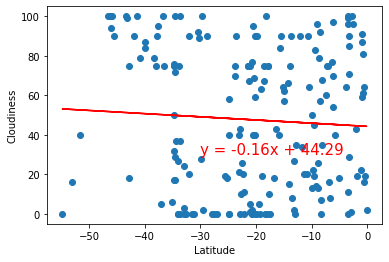

In [30]:
#example given by course

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.04370700782672967
{'y = 0.01x + 7.42'}


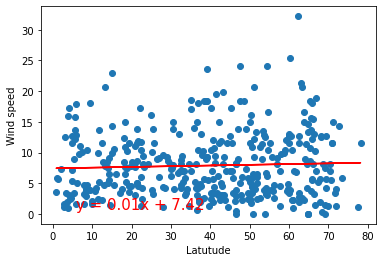

In [59]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Wind speed')
print(f"The r value is: {rvalue}")
print({line_eq})
plt.show()

The r-value is: 0.04019723576144484


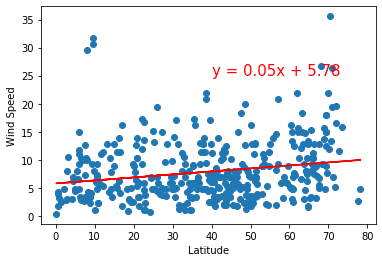

In [31]:
#example given by course

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.2932028316410347
{'y = -0.14x + 5.57'}


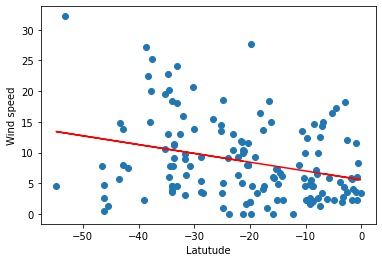

In [60]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Wind speed')
print(f"The r value is: {rvalue}")
print({line_eq})
plt.show()

The r-value is: 0.017128274759839232


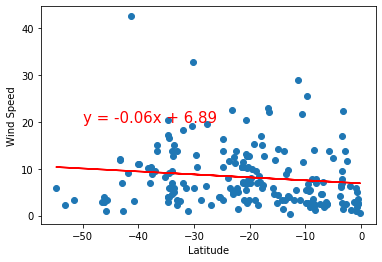

In [32]:
#example given by course